The second mission that we collected data for was the Pioneer mission, which consisted of two satelites that were launched away from the Earth towards the edge of the solar system. For this mission we had to time-shift individual month's worth of data at a time, but the data fields matched with OMNI more closely, so we only had to merge 2 datasets for this mission. 

For the sake of brevity, I won't show each individual month of time-shift, but the process is similar to that of the Artemis mission, except for on a monthly timescale. This time-shift was based upon the basic relationship between the average solar wind speed and distance as a starting point, but some manual timshifting was also used to get a better fit between all three main solar wind variables. We calculate a new time based upon subtracting a number of hours from the Pioneer time and then merge it with the OMNI time. All plots are based off of the time at Pioneer, however.

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

mF0 = pd.read_csv('Pioneer2.csv')

mF0['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(mF0['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
mF0['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(mF0['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

mF0.rename(columns = {'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ':'OMNI Time',
                      'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ':'Time'}, inplace = True)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_DENSITY_Ncm3', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_MAG_AVG_nT', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(figsize=(16, 8))
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

Text(0, 0.5, 'Au')

Similarly to the Artemis mission, we calculated the scaled density and magnetic average as well as the longitude and latitude differences, which were more significant for Pioneer because there is a larger range of values for distance and position. 

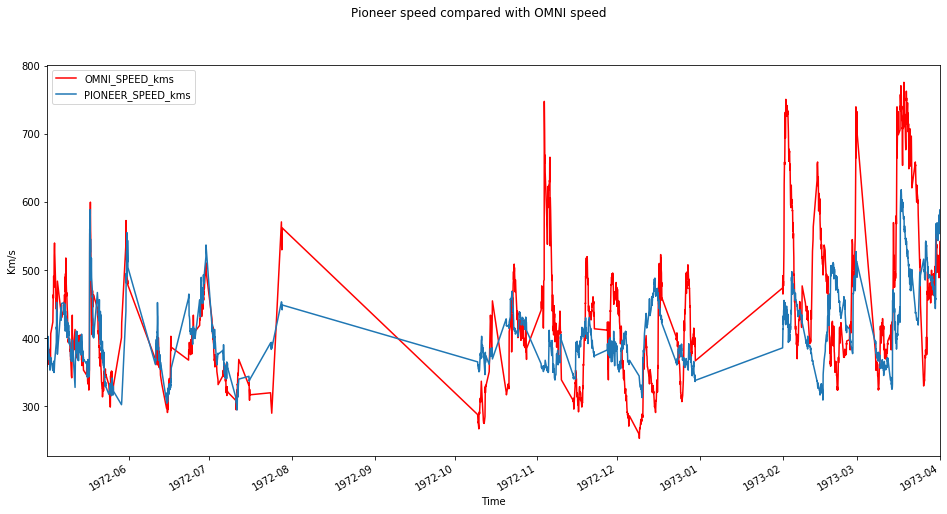

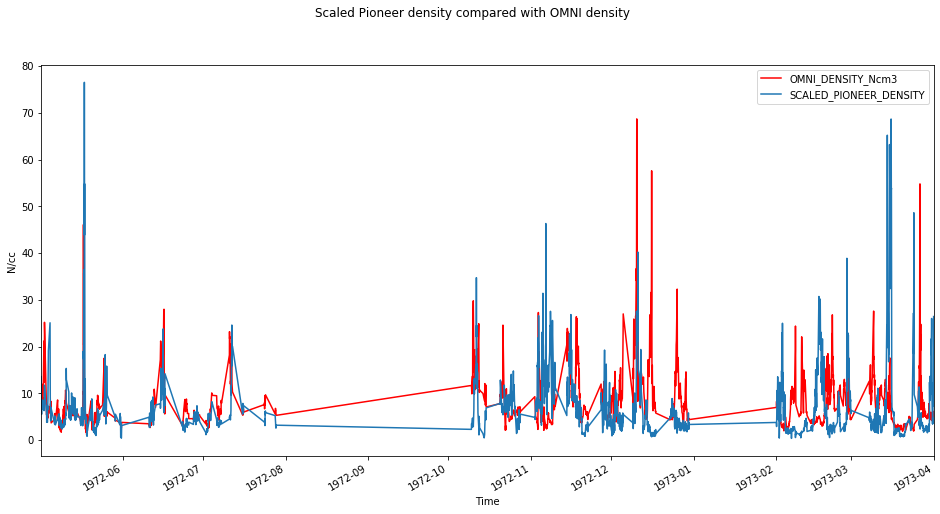

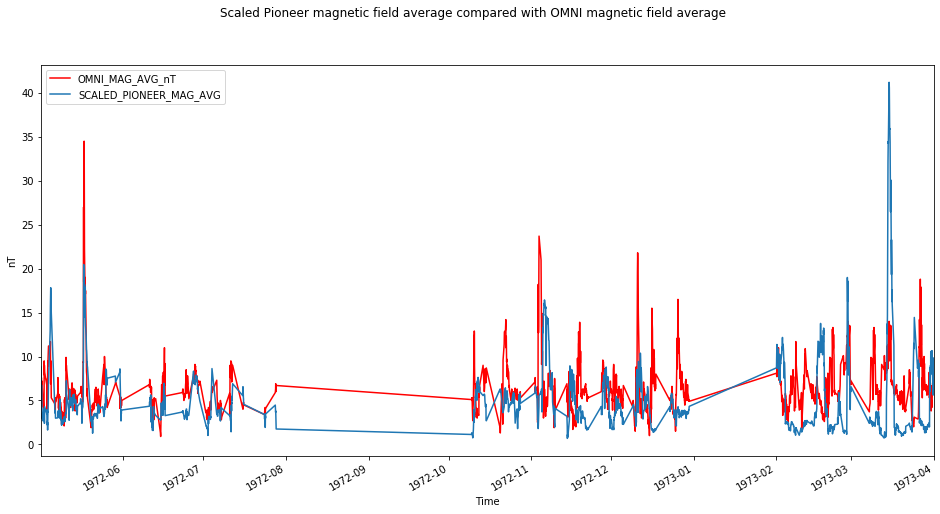

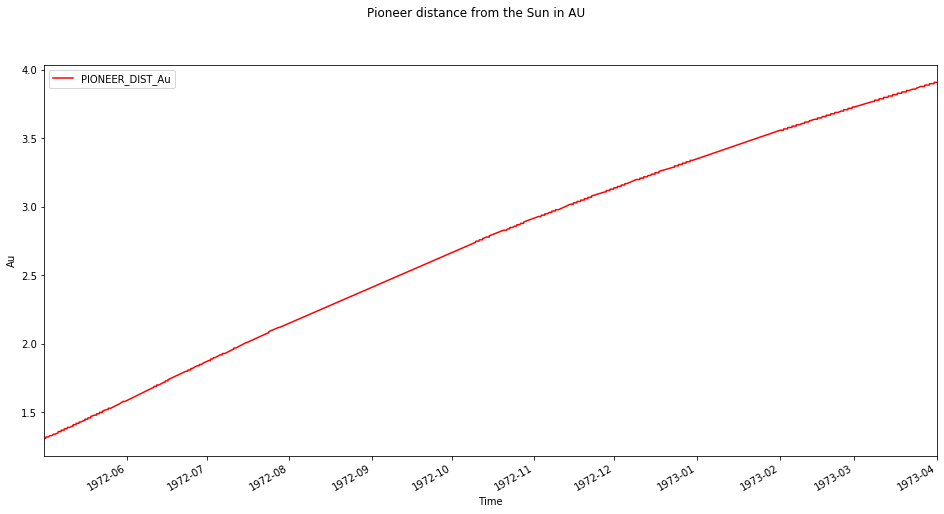

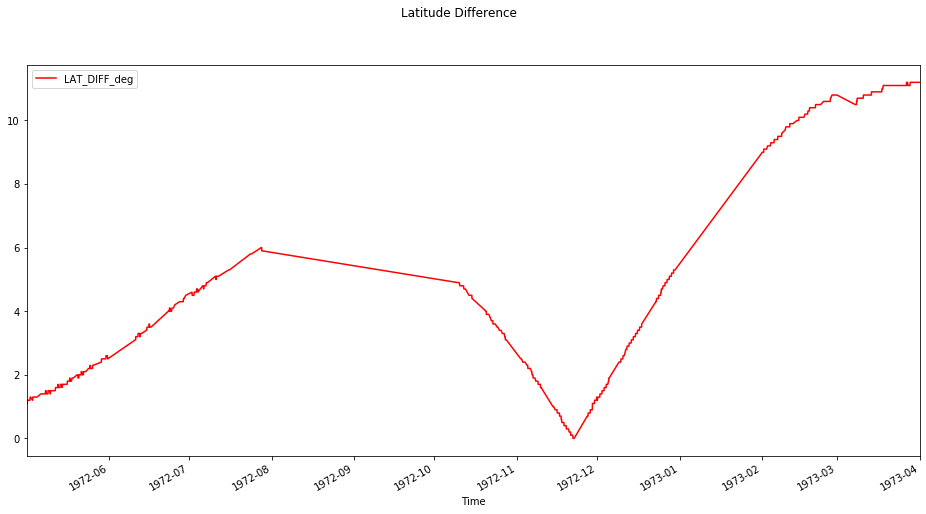

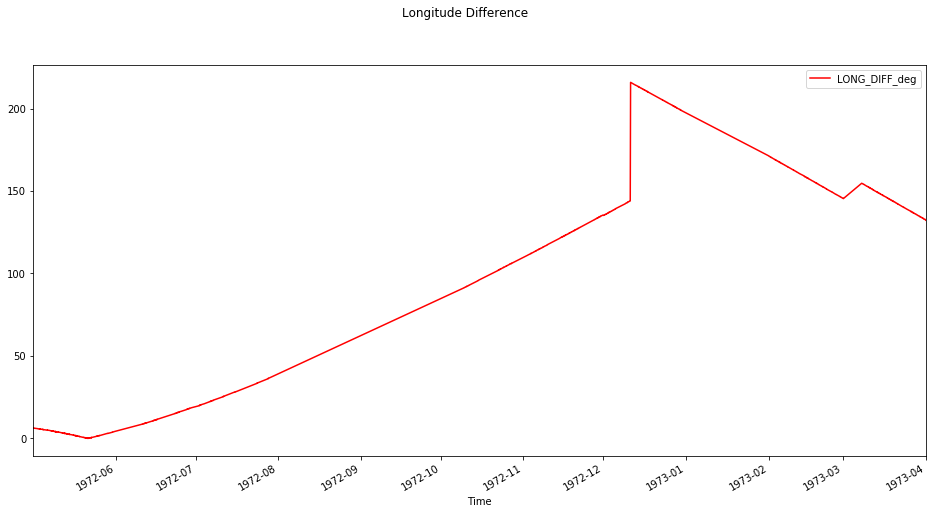

In [2]:
mF0['LAT_DIFF_deg'] = mF0.apply(lambda row: abs(row.OMNI_LAT_deg - row.PIONEER_LAT_deg), axis = 1)
mF0['LONG_DIFF_deg'] = mF0.apply(lambda row: abs(row.OMNI_LONG_deg - row.PIONEER_LONG_deg), axis = 1) 
mF0['SCALED_PIONEER_DENSITY'] = mF0.apply(lambda row: row.PIONEER_DENSITY_Ncm3 * row.PIONEER_DIST_Au * row.PIONEER_DIST_Au, axis = 1)
mF0['SCALED_PIONEER_MAG_AVG'] = mF0.apply(lambda row: row.PIONEER_MAG_AVG_nT * row.PIONEER_DIST_Au, axis = 1)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Pioneer density compared with OMNI density")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='SCALED_PIONEER_DENSITY', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF0.plot(kind='line', x='Time', y='SCALED_PIONEER_MAG_AVG', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(figsize=(16, 8))
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF0.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

fig5 = plt.figure(figsize=(16, 8))
fig5.suptitle("Latitude Difference")
az = plt.gca()
mF0.plot(kind='line', x='Time', y='LAT_DIFF_deg', color='red', ax=az)


fig6 = plt.figure(figsize=(16, 8))
fig6.suptitle("Longitude Difference")
az = plt.gca()
mF0.plot(kind='line', x='Time', y='LONG_DIFF_deg', color='red', ax=az)

Additionally, we calculated how the differences in the solar wind variables were affected by the latitude, longitude, and distance differences between Pioneer and OMNI.

C:\Users\Ian\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


Text(0, 0.5, 'nT Difference')

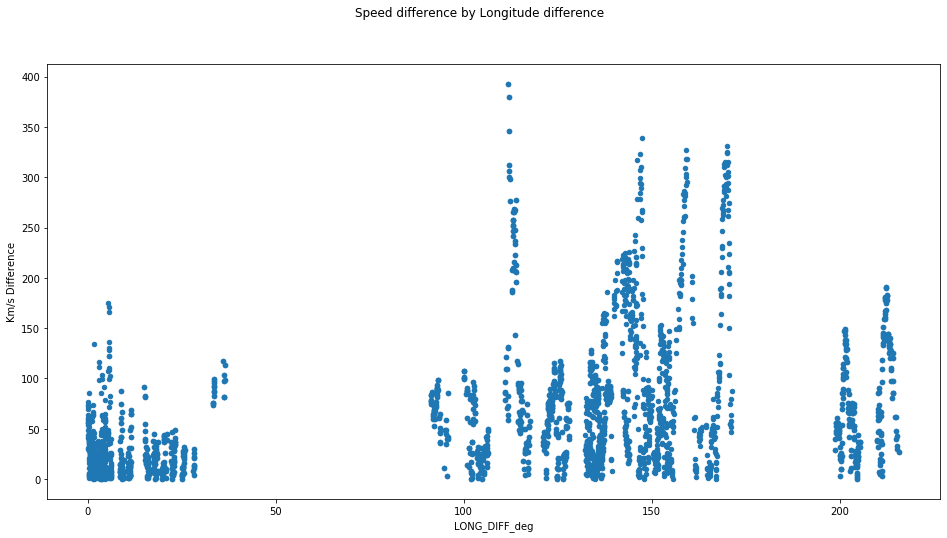

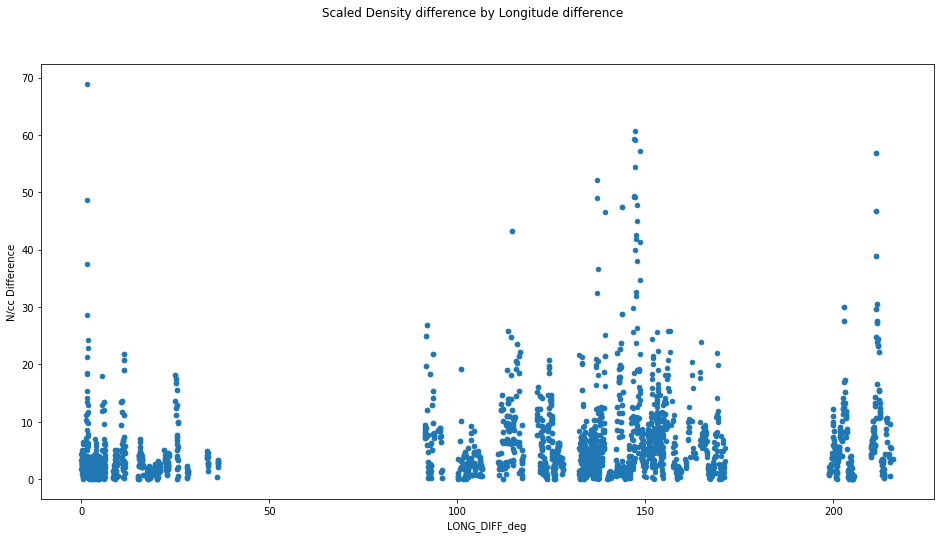

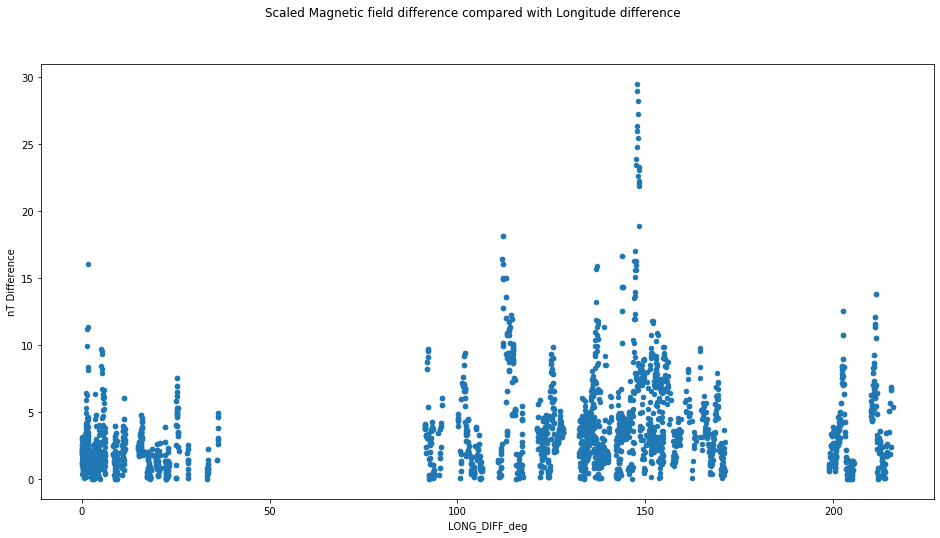

In [3]:
mF0['Speed_DIFF_Kms'] = mF0.apply(lambda row: abs(row.OMNI_SPEED_kms - row.PIONEER_SPEED_kms), axis = 1)
mF0['Density_DIFF_Ncc'] = mF0.apply(lambda row: abs(row.OMNI_DENSITY_Ncm3 - row.SCALED_PIONEER_DENSITY), axis = 1)
mF0['Mag_DIFF_nT'] = mF0.apply(lambda row: abs(row.OMNI_MAG_AVG_nT - row.SCALED_PIONEER_MAG_AVG), axis = 1)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Longitude difference")
ax = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Longitude difference")
ay = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Longitude difference")
az = plt.gca()
mF0.plot(kind='scatter', x='LONG_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

Text(0, 0.5, 'nT Difference')

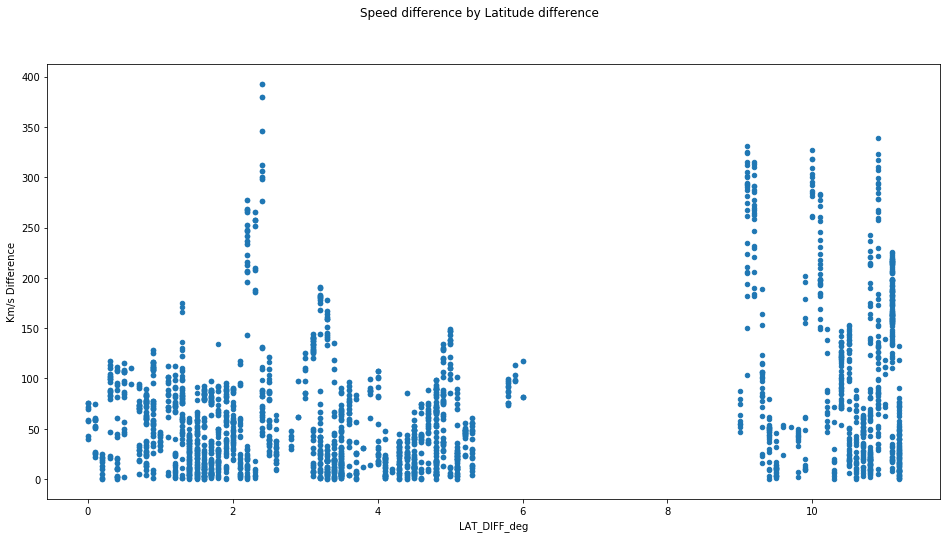

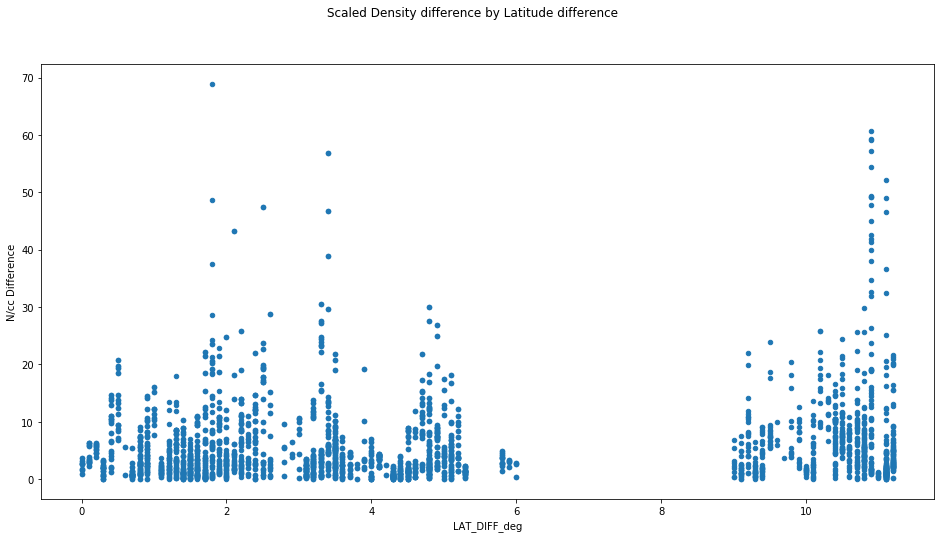

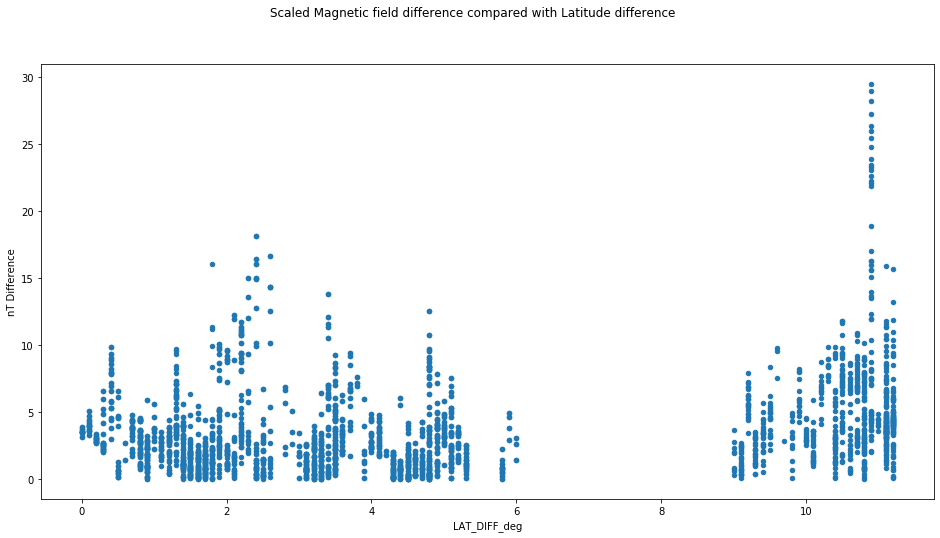

In [4]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Latitude difference")
ax = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Latitude difference")
ay = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Latitude difference")
az = plt.gca()
mF0.plot(kind='scatter', x='LAT_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

Text(0, 0.5, 'nT Difference')

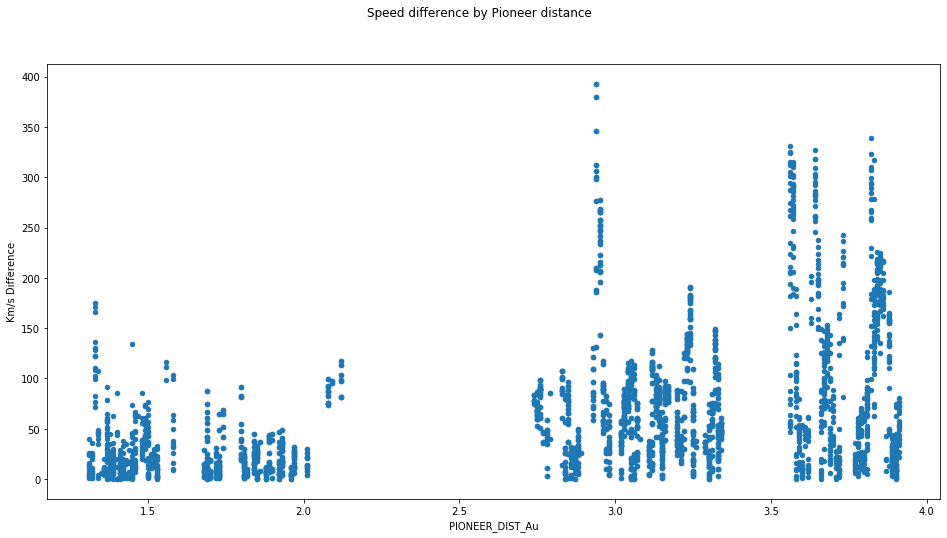

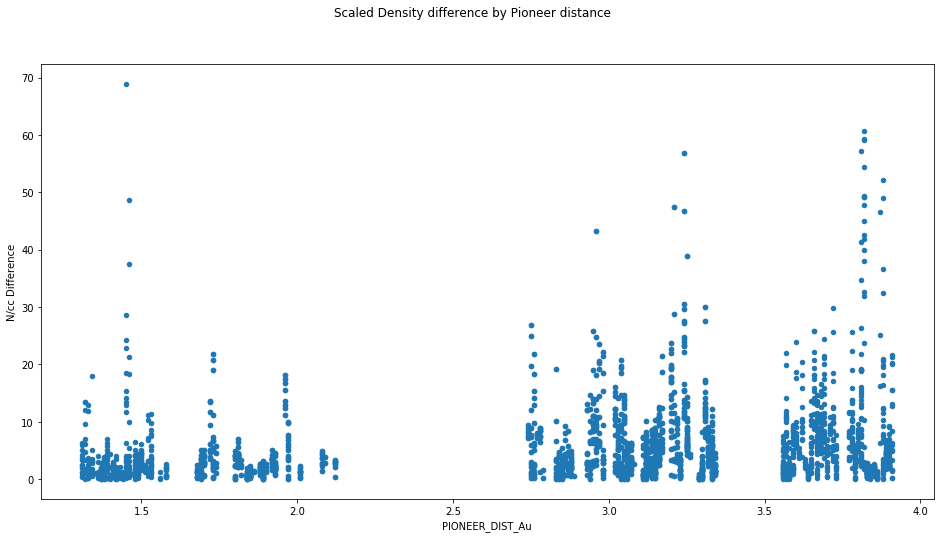

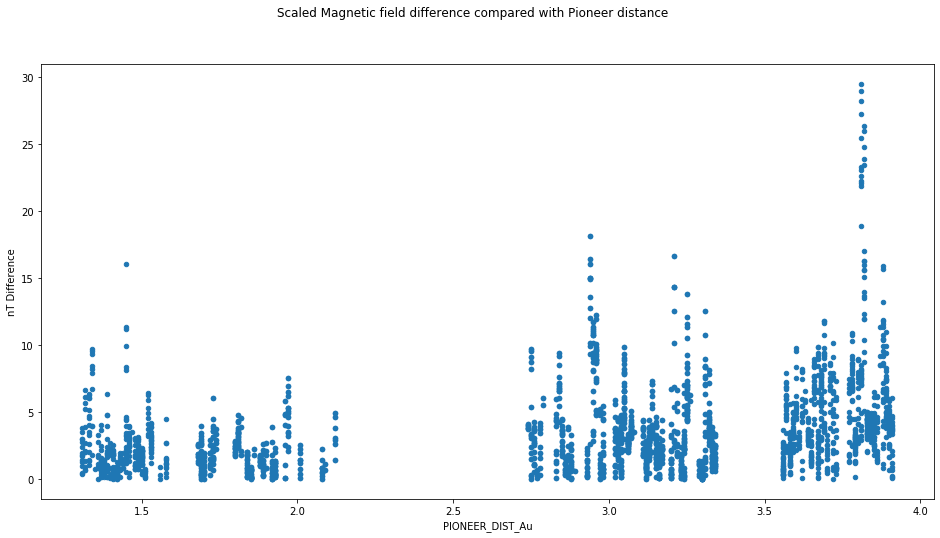

In [5]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Pioneer distance")
ax = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Pioneer distance")
ay = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Pioneer distance")
az = plt.gca()
mF0.plot(kind='scatter', x='PIONEER_DIST_Au', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

We essentially did the same process with the other Pioneer satelite and achieved a similar result, although there were fewer gaps in the data. Unlike the Artemis mission, collecting the second dataset was just as time-consuming as the first because each month had to be time-shifted individually.

Text(0, 0.5, 'Au')

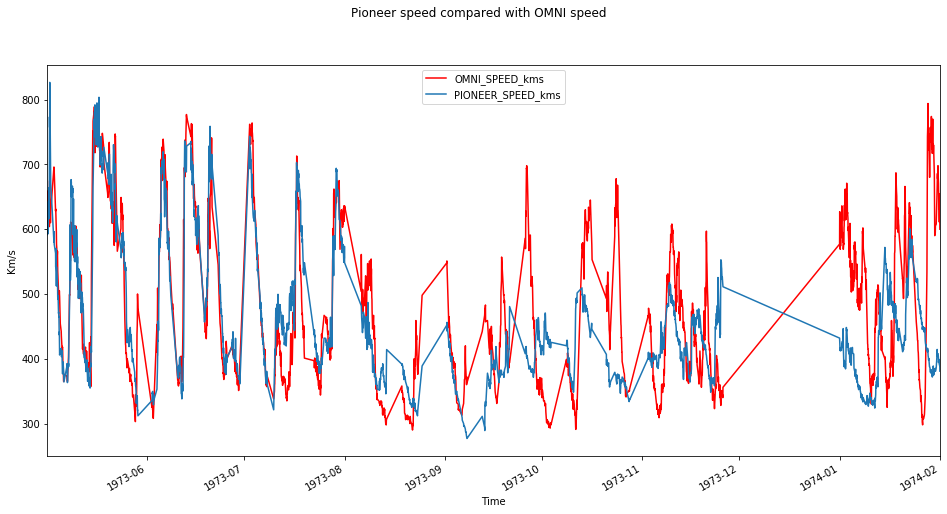

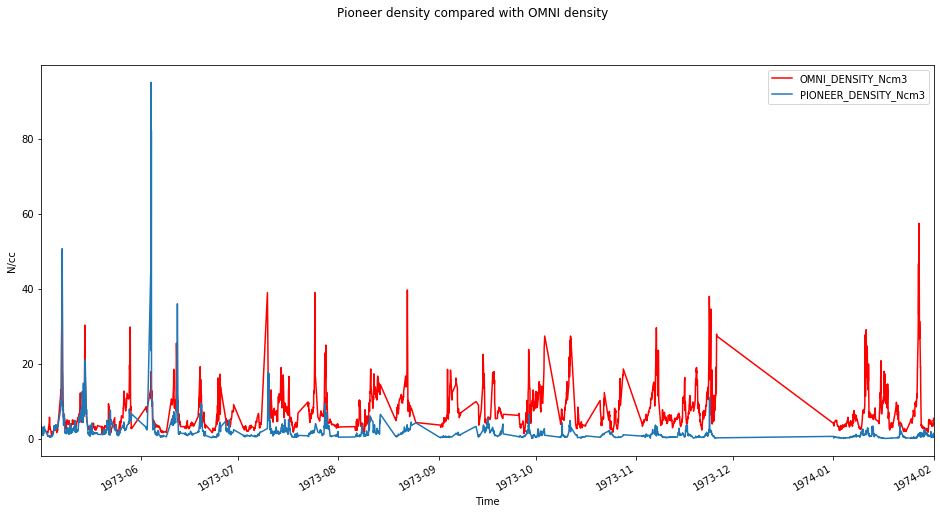

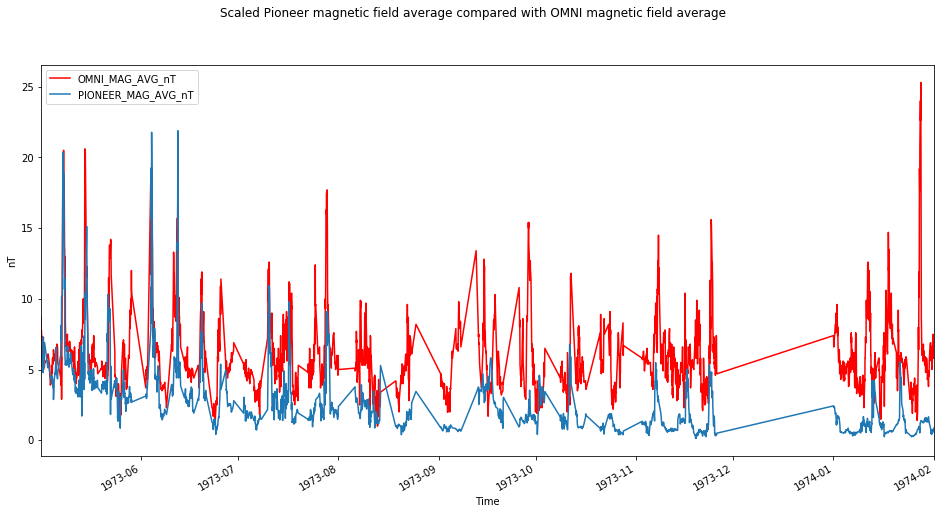

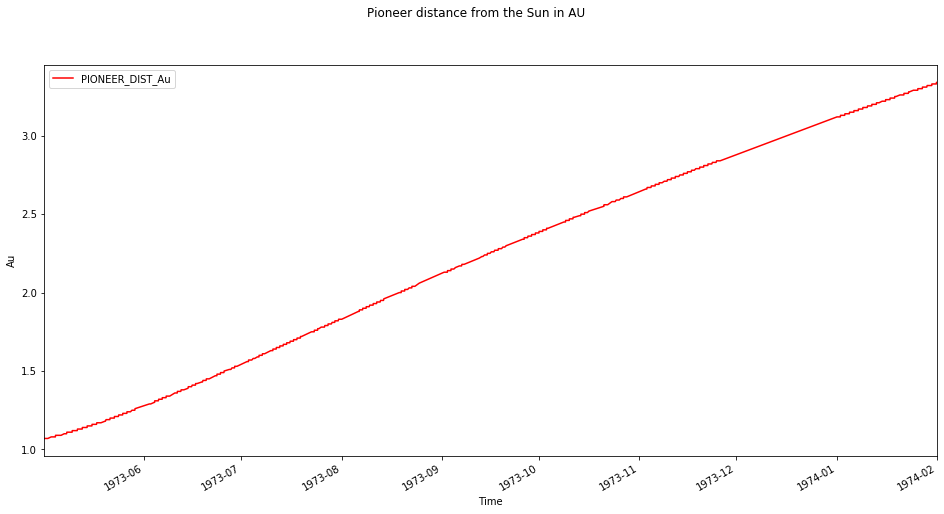

In [6]:
mF1 = pd.read_csv('Pioneer3.csv')

mF1['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(mF1['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])
mF1['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(mF1['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])

mF1.rename(columns = {'EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ':'OMNI Time',
                      'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ':'Time'}, inplace = True)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Pioneer density compared with OMNI density")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='PIONEER_DENSITY_Ncm3', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='PIONEER_MAG_AVG_nT', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(figsize=(16, 8))
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

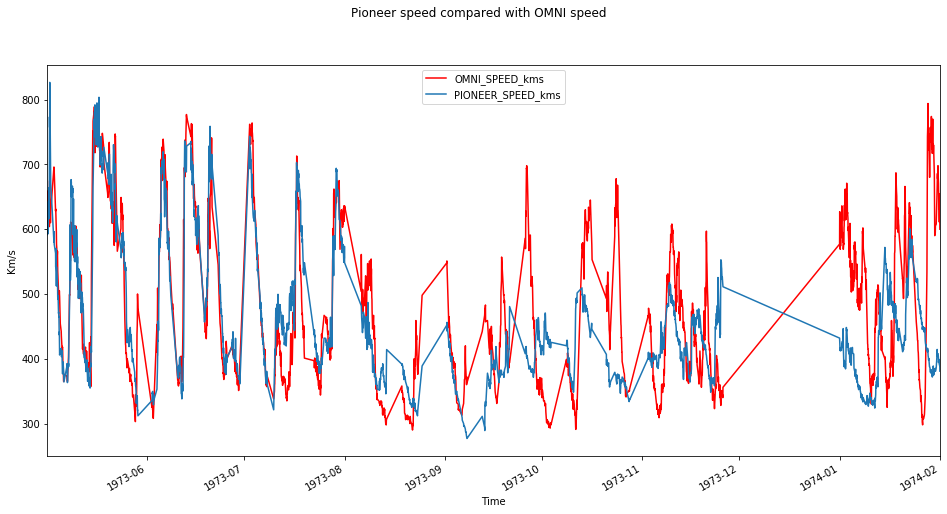

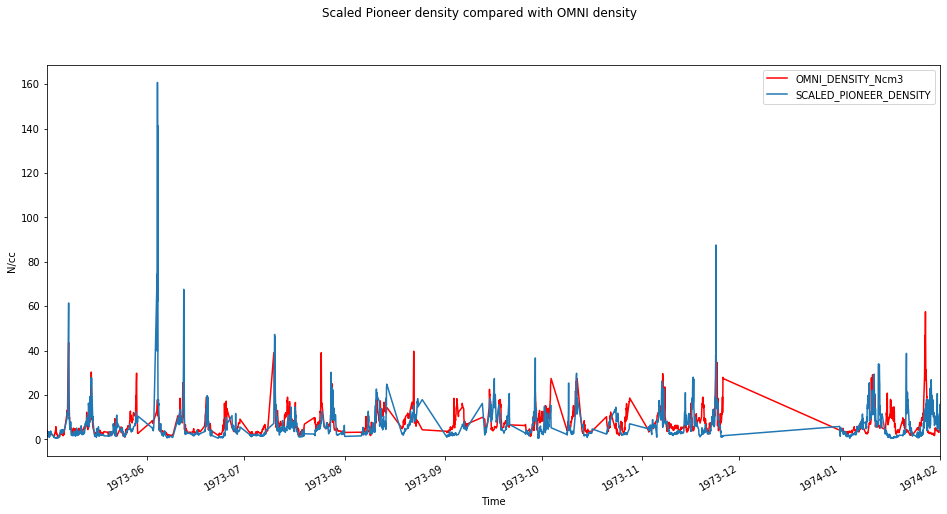

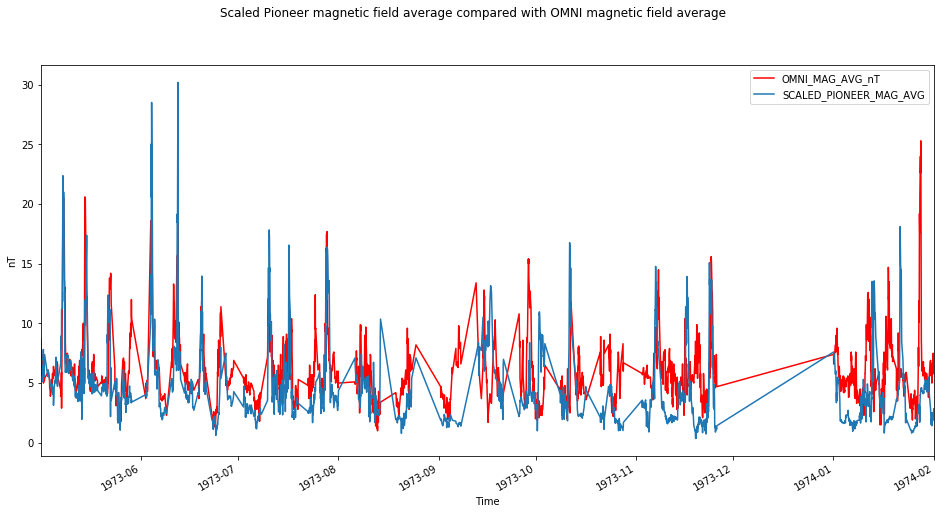

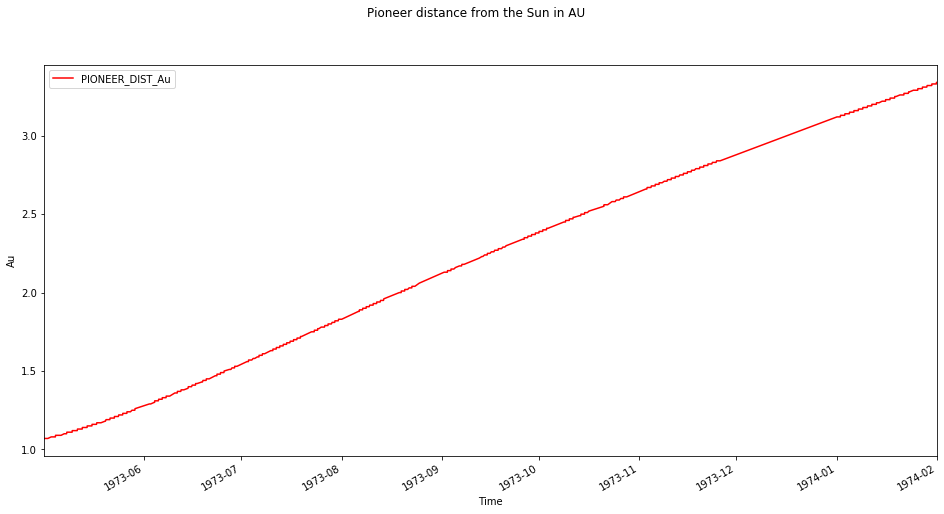

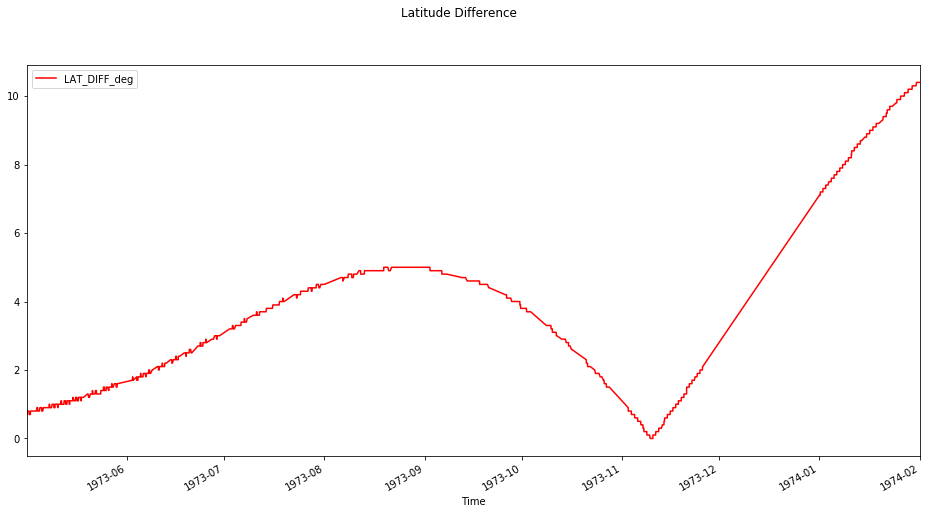

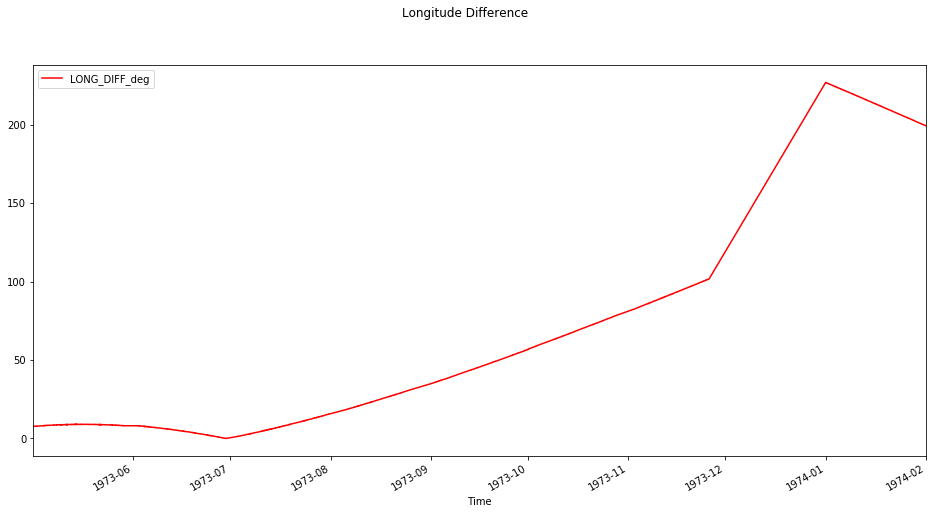

In [7]:
mF1['LAT_DIFF_deg'] = mF1.apply(lambda row: abs(row.OMNI_LAT_deg - row.PIONEER_LAT_deg), axis = 1)
mF1['LONG_DIFF_deg'] = mF1.apply(lambda row: abs(row.OMNI_LONG_deg - row.PIONEER_LONG_deg), axis = 1) 
mF1['SCALED_PIONEER_DENSITY'] = mF1.apply(lambda row: row.PIONEER_DENSITY_Ncm3 * row.PIONEER_DIST_Au * row.PIONEER_DIST_Au, axis = 1)
mF1['SCALED_PIONEER_MAG_AVG'] = mF1.apply(lambda row: row.PIONEER_MAG_AVG_nT * row.PIONEER_DIST_Au, axis = 1)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Pioneer density compared with OMNI density")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='SCALED_PIONEER_DENSITY', ax=ax)
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='SCALED_PIONEER_MAG_AVG', ax=ax)
plt.ylabel("nT")

fig4 = plt.figure(figsize=(16, 8))
fig4.suptitle("Pioneer distance from the Sun in AU")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='PIONEER_DIST_Au', color='red', ax=ax)
plt.ylabel("Au")

fig5 = plt.figure(figsize=(16, 8))
fig5.suptitle("Latitude Difference")
az = plt.gca()
mF1.plot(kind='line', x='Time', y='LAT_DIFF_deg', color='red', ax=az)


fig6 = plt.figure(figsize=(16, 8))
fig6.suptitle("Longitude Difference")
az = plt.gca()
mF1.plot(kind='line', x='Time', y='LONG_DIFF_deg', color='red', ax=az)

Text(0, 0.5, 'nT Difference')

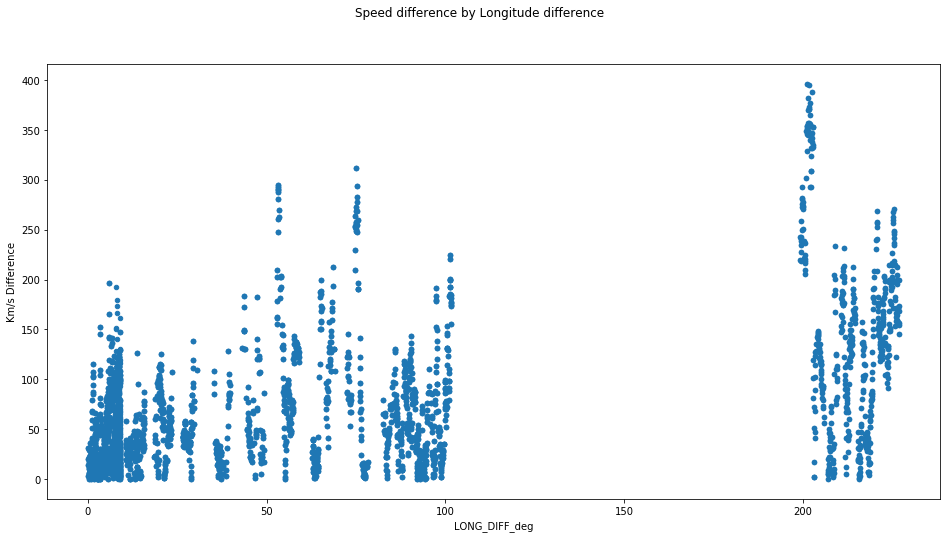

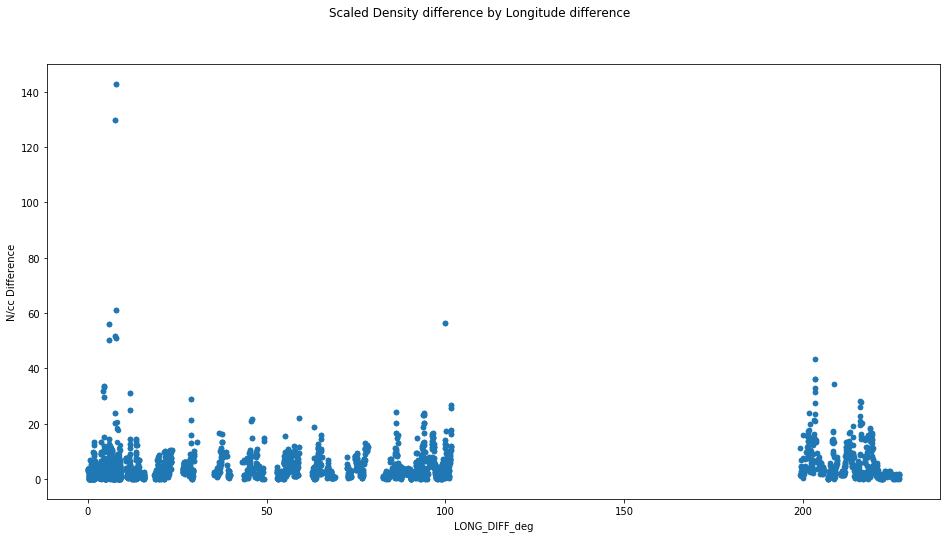

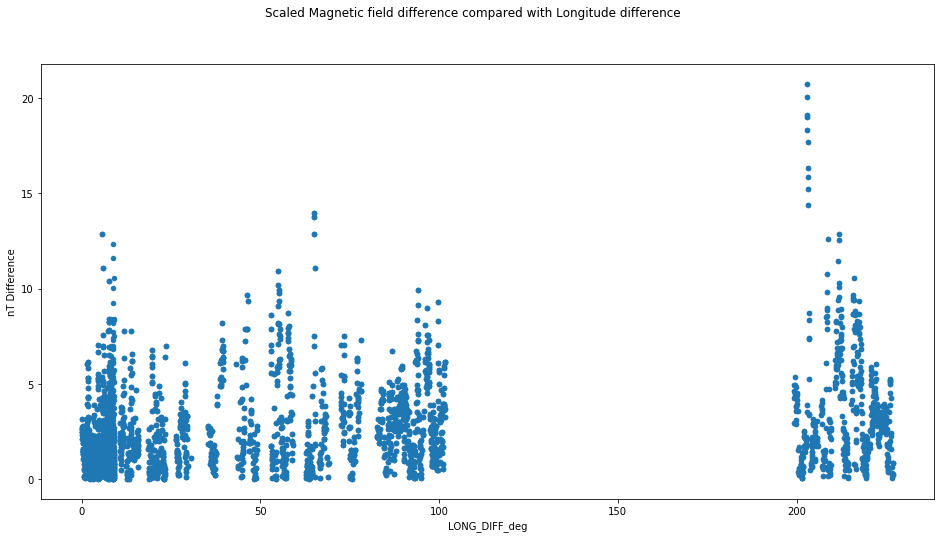

In [8]:
mF1['Speed_DIFF_Kms'] = mF1.apply(lambda row: abs(row.OMNI_SPEED_kms - row.PIONEER_SPEED_kms), axis = 1)
mF1['Density_DIFF_Ncc'] = mF1.apply(lambda row: abs(row.OMNI_DENSITY_Ncm3 - row.SCALED_PIONEER_DENSITY), axis = 1)
mF1['Mag_DIFF_nT'] = mF1.apply(lambda row: abs(row.OMNI_MAG_AVG_nT - row.SCALED_PIONEER_MAG_AVG), axis = 1)

fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Longitude difference")
ax = plt.gca()
mF1.plot(kind='scatter', x='LONG_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Longitude difference")
ay = plt.gca()
mF1.plot(kind='scatter', x='LONG_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Longitude difference")
az = plt.gca()
mF1.plot(kind='scatter', x='LONG_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

Text(0, 0.5, 'nT Difference')

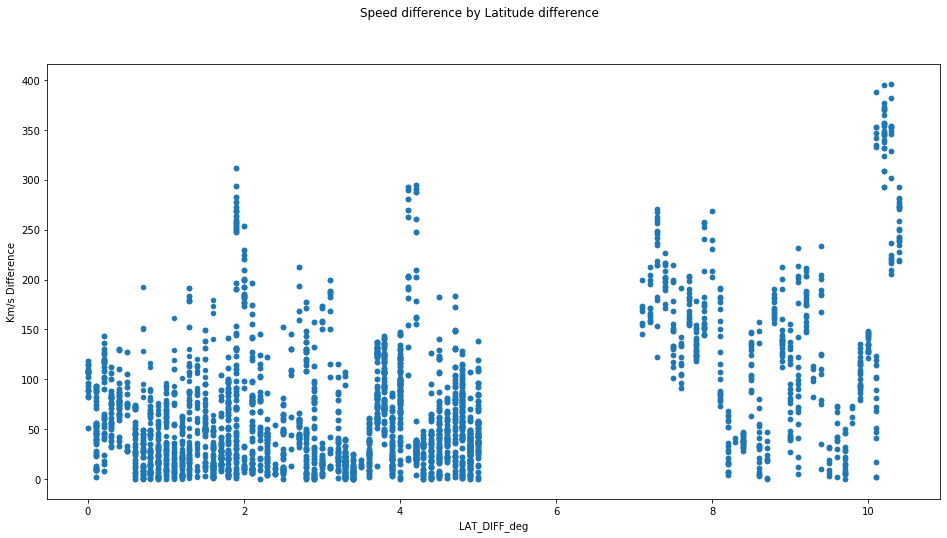

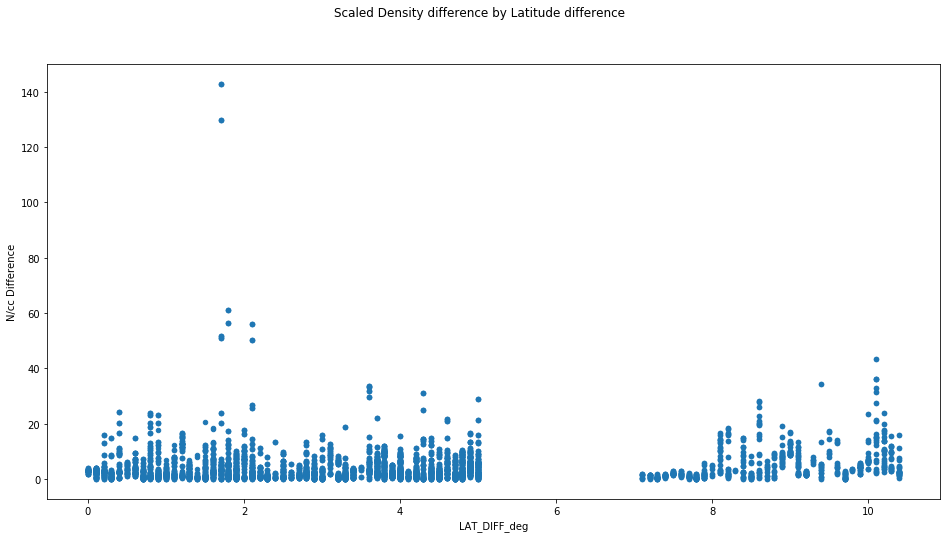

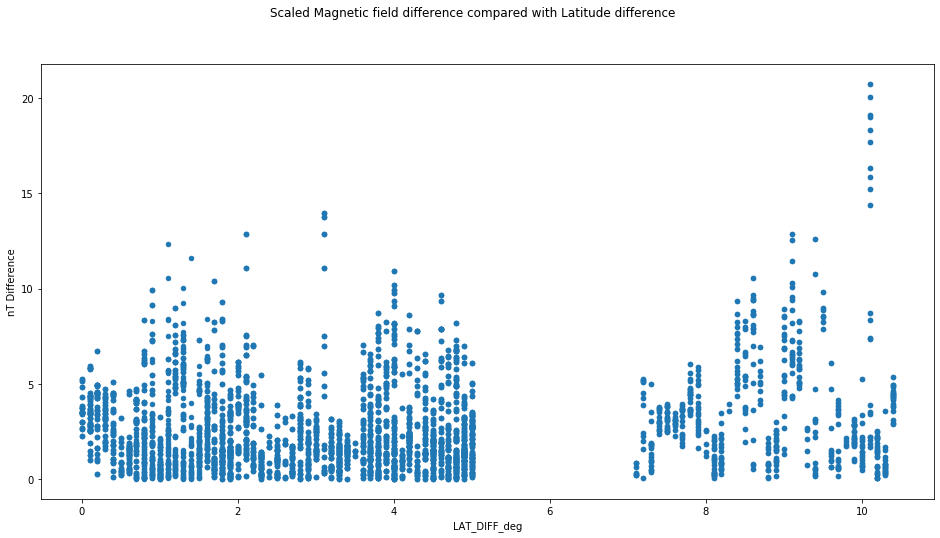

In [9]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Latitude difference")
ax = plt.gca()
mF1.plot(kind='scatter', x='LAT_DIFF_deg', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Latitude difference")
ay = plt.gca()
mF1.plot(kind='scatter', x='LAT_DIFF_deg', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Latitude difference")
az = plt.gca()
mF1.plot(kind='scatter', x='LAT_DIFF_deg', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

Text(0, 0.5, 'nT Difference')

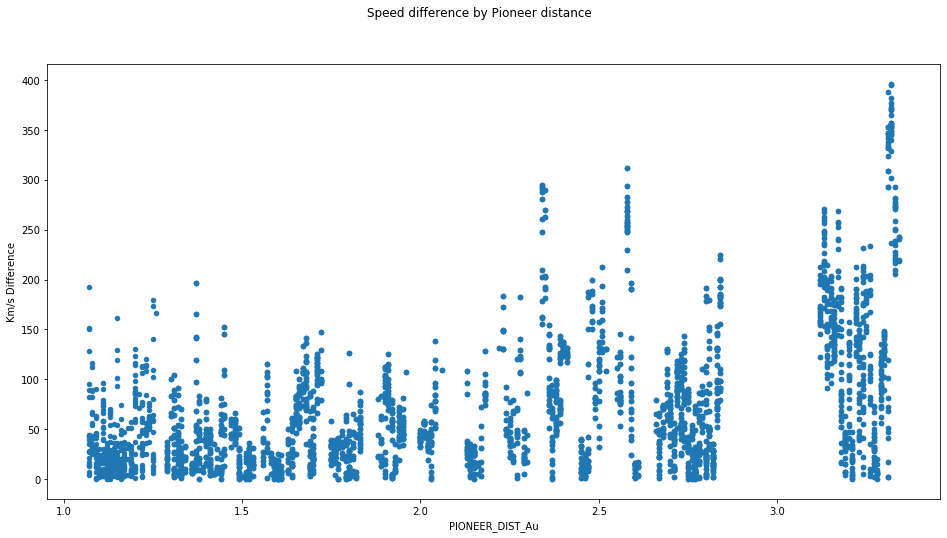

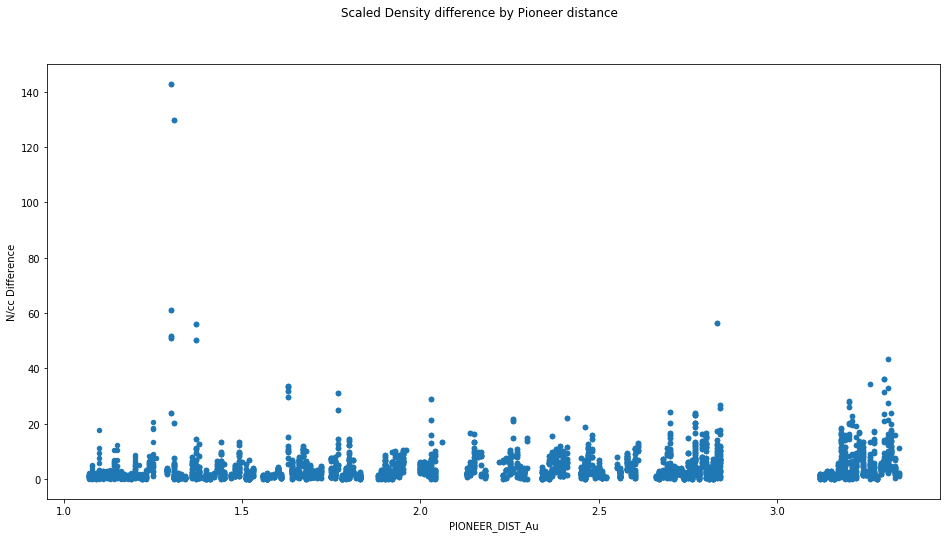

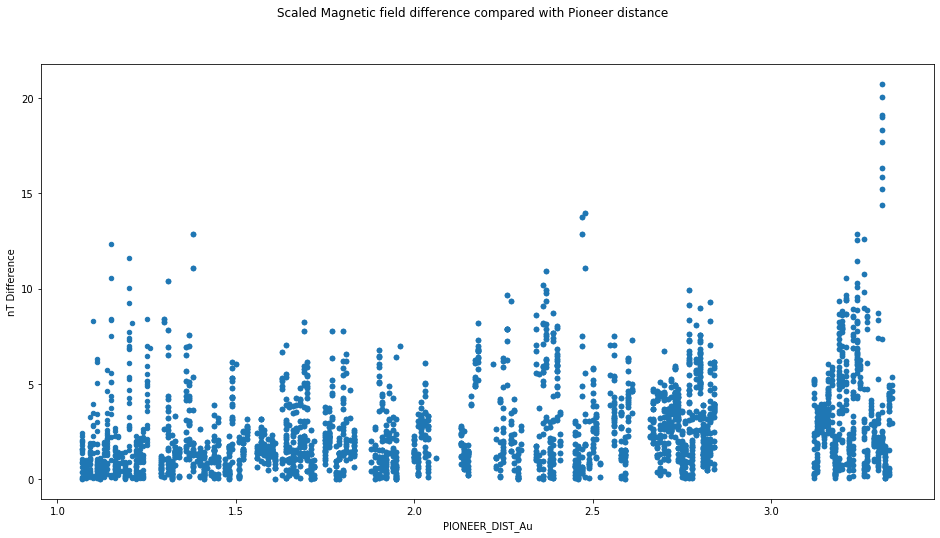

In [10]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Speed difference by Pioneer distance")
ax = plt.gca()
mF1.plot(kind='scatter', x='PIONEER_DIST_Au', y='Speed_DIFF_Kms', ax=ax)
plt.ylabel("Km/s Difference")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Density difference by Pioneer distance")
ay = plt.gca()
mF1.plot(kind='scatter', x='PIONEER_DIST_Au', y='Density_DIFF_Ncc', ax=ay)
plt.ylabel("N/cc Difference")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Magnetic field difference compared with Pioneer distance")
az = plt.gca()
mF1.plot(kind='scatter', x='PIONEER_DIST_Au', y='Mag_DIFF_nT', ax=az)
plt.ylabel("nT Difference")

We were also asked to show some of the arrival times between the OMNI and Pioneer data to show how accurate the time-shift is. Here are some periods where the time-shift is working well on the Pioneer data from the second set of data.

Text(0, 0.5, 'nT')

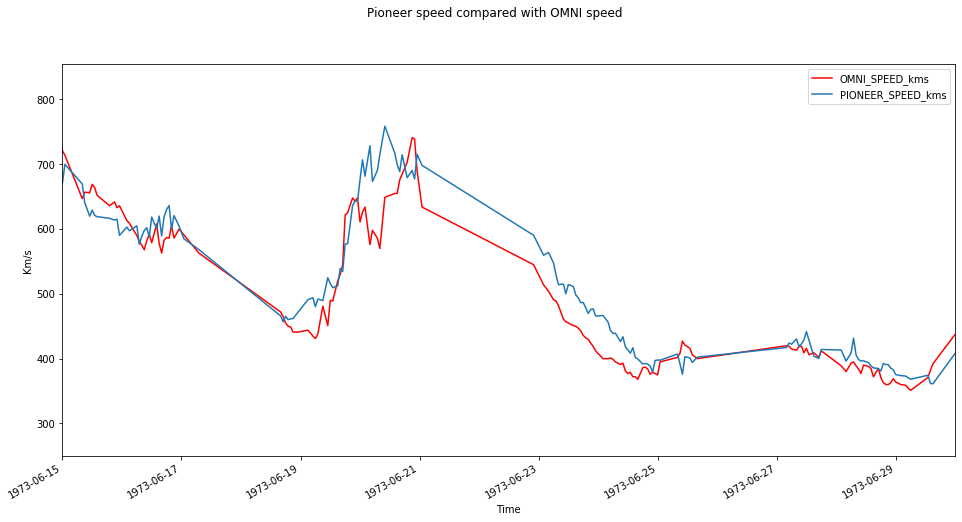

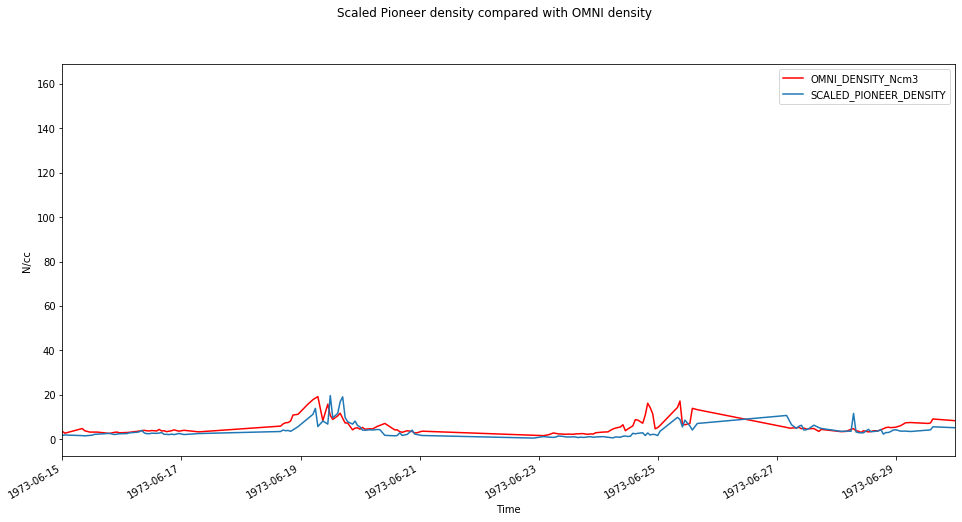

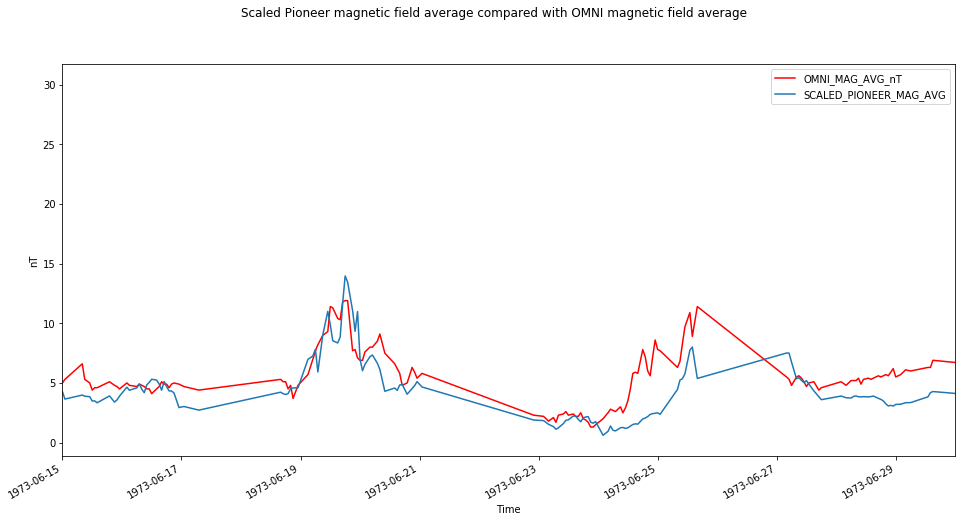

In [11]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
ax.set_xlim([datetime.date(1973, 6, 15), datetime.date(1973, 6, 30)])
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Pioneer density compared with OMNI density")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='SCALED_PIONEER_DENSITY', ax=ax)
ax.set_xlim([datetime.date(1973, 6, 15), datetime.date(1973, 6, 30)])
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='SCALED_PIONEER_MAG_AVG', ax=ax)
ax.set_xlim([datetime.date(1973, 6, 15), datetime.date(1973, 6, 30)])
plt.ylabel("nT")

Here is a place where the time-shift is not performing as well.

Text(0, 0.5, 'nT')

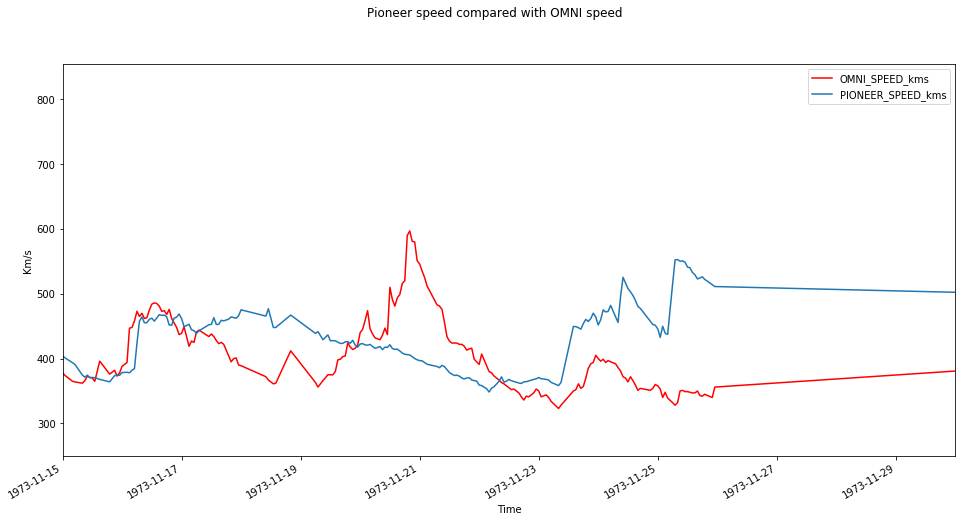

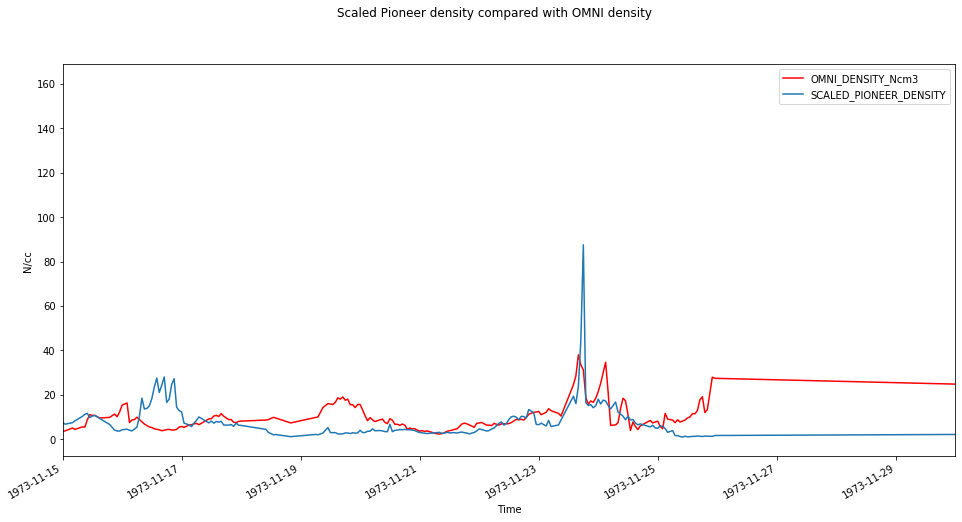

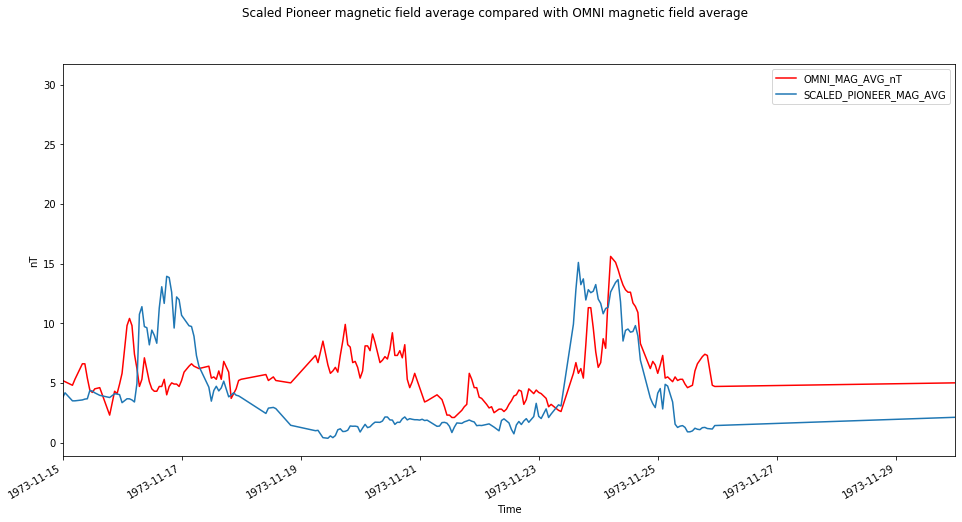

In [12]:
fig1 = plt.figure(figsize=(16, 8))
fig1.suptitle("Pioneer speed compared with OMNI speed")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_SPEED_kms', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='PIONEER_SPEED_kms', ax=ax)
ax.set_xlim([datetime.date(1973, 11, 15), datetime.date(1973, 11, 30)])
plt.ylabel("Km/s")

fig2 = plt.figure(figsize=(16, 8))
fig2.suptitle("Scaled Pioneer density compared with OMNI density")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_DENSITY_Ncm3', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='SCALED_PIONEER_DENSITY', ax=ax)
ax.set_xlim([datetime.date(1973, 11, 15), datetime.date(1973, 11, 30)])
plt.ylabel("N/cc")

fig3 = plt.figure(figsize=(16, 8))
fig3.suptitle("Scaled Pioneer magnetic field average compared with OMNI magnetic field average")
ax = plt.gca()
mF1.plot(kind='line', x='Time', y='OMNI_MAG_AVG_nT', color='red', ax=ax)
mF1.plot(kind='line', x='Time', y='SCALED_PIONEER_MAG_AVG', ax=ax)
ax.set_xlim([datetime.date(1973, 11, 15), datetime.date(1973, 11, 30)])
plt.ylabel("nT")

In summary, I think the take-away from the Pioneer data is that taking a more naive approach to time shifting data is possible, but it works much better on data without much difference in terms of Latitude. In general, my opinion would be to build another model that would take in the data from the target mission and from OMNI, and try and calculate the time-shift that way instead of relying on more naive methods.